<a href="https://colab.research.google.com/github/eriksali/DNN_2023_DL/blob/main/DNN_a4_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[*********************100%***********************]  3 of 3 completed
Epoch [1/1000], Train Loss: 1.1798, Test Loss: 1177124992.0000
Epoch [101/1000], Train Loss: 0.4109, Test Loss: 1177032320.0000
Epoch [201/1000], Train Loss: 0.2231, Test Loss: 1177036672.0000
Epoch [301/1000], Train Loss: 0.1574, Test Loss: 1177039232.0000
Epoch [401/1000], Train Loss: 0.1240, Test Loss: 1177040896.0000
Epoch [501/1000], Train Loss: 0.1038, Test Loss: 1177041792.0000
Epoch [601/1000], Train Loss: 0.0901, Test Loss: 1177042560.0000
Epoch [701/1000], Train Loss: 0.0803, Test Loss: 1177042944.0000
Epoch [801/1000], Train Loss: 0.0728, Test Loss: 1177042944.0000
Epoch [901/1000], Train Loss: 0.0670, Test Loss: 1177043456.0000


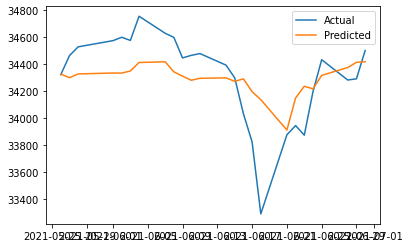

In [ ]:
# Q2
# train a RNN to perform time series prediction. The task is to build a model for predicting S&P index for day “t” using the closing prices of Dow Jones index and Nasdaq for day “t-1”.  You can use training data for any 6 months period and test the performance for the following one-month period. Yahoo Finance is an excellent source for data for this project.

import torch
import torch.nn as nn
import numpy as np
import pandas as pd
##!pip install yfinance
import yfinance as yf

# Define the model
class Predictor(nn.Module):
    def __init__(self):
        super(Predictor, self).__init__()
        self.fc1 = nn.Linear(2, 16)
        self.fc2 = nn.Linear(16, 8)
        self.fc3 = nn.Linear(8, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Download data from Yahoo Finance
start_date = '2021-01-01'
end_date = '2021-07-01'
tickers = ['^GSPC', '^DJI', '^IXIC']
df = yf.download(tickers, start=start_date, end=end_date)['Adj Close']
df = df.dropna()

# Prepare the data for training and testing
X = np.array(df.iloc[:-1, [1, 2]])
Y = np.array(df.iloc[1:, 0])
train_size = int(0.8 * len(X))
train_X, train_Y = X[:train_size], Y[:train_size]
test_X, test_Y = X[train_size:], Y[train_size:]

# Normalize the data
train_X_mean = np.mean(train_X, axis=0)
train_X_std = np.std(train_X, axis=0)
train_X = (train_X - train_X_mean) / train_X_std
train_Y_mean = np.mean(train_Y)
train_Y_std = np.std(train_Y)
train_Y = (train_Y - train_Y_mean) / train_Y_std
test_X = (test_X - train_X_mean) / train_X_std

# Train the model
model = Predictor()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

num_epochs = 1000
batch_size = 32
train_losses = []
test_losses = []
for epoch in range(num_epochs):
    # Training phase
    model.train()
    for i in range(0, train_X.shape[0], batch_size):
        batch_X = torch.tensor(train_X[i:i+batch_size], dtype=torch.float32)
        batch_Y = torch.tensor(train_Y[i:i+batch_size], dtype=torch.float32).unsqueeze(1)
        optimizer.zero_grad()
        output = model(batch_X)
        loss = criterion(output, batch_Y)
        loss.backward()
        optimizer.step()
        train_losses.append(loss.item())

    # Evaluation phase
    model.eval()
    with torch.no_grad():
        test_X_tensor = torch.tensor(test_X, dtype=torch.float32)
        test_Y_tensor = torch.tensor(test_Y, dtype=torch.float32).unsqueeze(1)
        test_output = model(test_X_tensor)
        test_loss = criterion(test_output, test_Y_tensor)
        test_losses.append(test_loss.item())

    # Print the training progress
    if epoch % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {np.mean(train_losses):.4f}, Test Loss: {test_loss.item():.4f}')

# Denormalize the predictions
test_predictions = test_output.numpy().squeeze() * train_Y_std + train_Y_mean

# Plot the results
import matplotlib.pyplot as plt
plt.plot(df.index[train_size+1:], df.iloc[train_size+1:, 0])
plt.plot(df.index[train_size+1:], test_predictions)
plt.legend(['Actual', 'Predicted'])
plt.show()


Epoch 1/10, Train Loss: 0.1072
Epoch 2/10, Train Loss: 0.0547
Epoch 3/10, Train Loss: 0.0462
Epoch 4/10, Train Loss: 0.0415
Epoch 5/10, Train Loss: 0.0384
Epoch 6/10, Train Loss: 0.0360
Epoch 7/10, Train Loss: 0.0342
Epoch 8/10, Train Loss: 0.0328
Epoch 9/10, Train Loss: 0.0315
Epoch 10/10, Train Loss: 0.0305


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

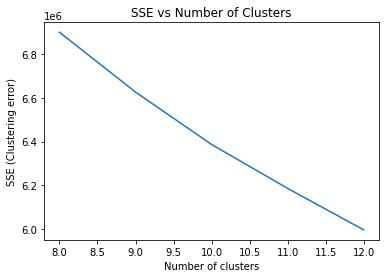

In [2]:
# Q1.8
# Perform k-means clustering on the Fashion-MNIST data. 
# Vary the number of clusters from 8 to 12 and plot the SSE (Clustering error) against the number of clusters

import numpy as np
import torch
from torchvision import datasets, transforms
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Set the device to GPU if available, else CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define the model
class Autoencoder(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.encoder = torch.nn.Sequential(
            torch.nn.Conv2d(1, 16, kernel_size=3, stride=2, padding=1),
            torch.nn.ReLU(),
            torch.nn.Conv2d(16, 32, kernel_size=3, stride=2, padding=1),
            torch.nn.ReLU(),
            torch.nn.Flatten(),
            torch.nn.Linear(7 * 7 * 32, 256),
            torch.nn.ReLU(),
            torch.nn.Linear(256, 64)
        )
        self.decoder = torch.nn.Sequential(
            torch.nn.Linear(64, 256),
            torch.nn.ReLU(),
            torch.nn.Linear(256, 7 * 7 * 32),
            torch.nn.ReLU(),
            torch.nn.Unflatten(1, (32, 7, 7)),
            torch.nn.ConvTranspose2d(32, 16, kernel_size=3, stride=2, padding=1, output_padding=1),
            torch.nn.ReLU(),
            torch.nn.ConvTranspose2d(16, 1, kernel_size=3, stride=2, padding=1, output_padding=1),
            torch.nn.Tanh()
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded, encoded

# Load Fashion-MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Initialize the model and send it to the device
model = Autoencoder().to(device)

# Train the model
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
num_epochs = 10
for epoch in range(num_epochs):
    train_loss = 0.0
    for images, _ in trainloader:
        images = images.to(device)
        optimizer.zero_grad()
        outputs, _ = model(images)
        loss = criterion(outputs, images)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * images.size(0)
    train_loss /= len(trainloader.dataset)
    print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}')

# Extract feature vectors from the dataset
features = []
for images, _ in trainloader:
    images = images.to(device)
    with torch.no_grad():
        _, features_batch = model(images)
    features.append(features_batch.cpu().numpy())
features = np.concatenate(features, axis=0)


# Calculate SSE for different number of clusters
sse = []
for n_clusters in range(8, 13):
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(features)
    sse.append(kmeans.inertia_)

# Plot SSE against number of clusters
plt.plot(range(8, 13), sse)
plt.xlabel('Number of clusters')
plt.ylabel('SSE (Clustering error)')
plt.title('SSE vs Number of Clusters')
plt.show()


Number of Clusters: 8, Clustering Error: 340308.10
Number of Clusters: 9, Clustering Error: 334829.57
Number of Clusters: 10, Clustering Error: 329712.78
Number of Clusters: 11, Clustering Error: 325561.76
Number of Clusters: 12, Clustering Error: 321411.05


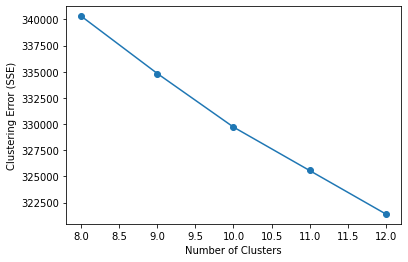

In [ ]:
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt

# Load Fashion-MNIST dataset
train_data = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True, transform=torchvision.transforms.ToTensor())
batch_size = 1000
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True)
def kmeans_clustering(data, num_clusters, max_iterations=100):
    # Initialize cluster centers randomly
    indices = np.random.choice(data.shape[0], num_clusters, replace=False)
    centers = data[indices]
    for i in range(max_iterations):
        # Assign each data point to the nearest cluster center
        distances = torch.cdist(data, centers)
        assignments = torch.argmin(distances, dim=1)
        # Update cluster centers
        for j in range(num_clusters):
            mask = (assignments == j)
            if torch.sum(mask) > 0:
                centers[j] = torch.mean(data[mask], dim=0)
    # Compute clustering error (SSE)
    distances = torch.cdist(data, centers)
    errors = torch.sum(torch.min(distances, dim=1)[0])
    return errors.item()

num_clusters_list = [8, 9, 10, 11, 12]
sse_list = []
for num_clusters in num_clusters_list:
    sse = 0
    for batch_idx, (data, target) in enumerate(train_loader):
        data = data.view(data.shape[0], -1)
        sse += kmeans_clustering(data, num_clusters)
    sse_list.append(sse)
    print(f"Number of Clusters: {num_clusters}, Clustering Error: {sse:.2f}")

plt.plot(num_clusters_list, sse_list, 'o-')
plt.xlabel('Number of Clusters')
plt.ylabel('Clustering Error (SSE)')
plt.show()


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Epoch [1/10], Loss: 0.0192
Epoch [2/10], Loss: 0.0152
Epoch [3/10], Loss: 0.0143
Epoch [4/10], Loss: 0.0135
Epoch [5/10], Loss: 0.0166
Epoch [6/10], Loss: 0.0208
Epoch [7/10], Loss: 0.0130
Epoch [8/10], Loss: 0.0136
Epoch [9/10], Loss: 0.0150
Epoch [10/10], Loss: 0.0140


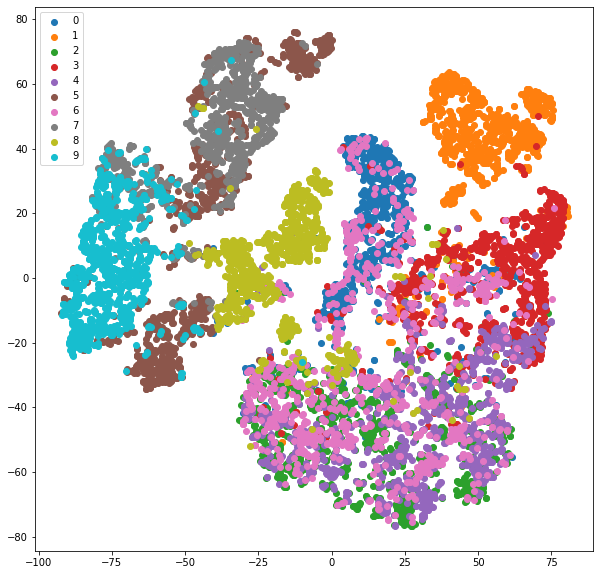

In [ ]:
# Q1.7
# Repeat the autoencoder steps with a nonlinear autoencoder and compare the results against PCA and linear encoder.

!pip install torch numpy matplotlib sklearn
from torchvision.datasets import FashionMNIST
from torchvision import transforms
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
transform = transforms.Compose([transforms.ToTensor()])

trainset = FashionMNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset = FashionMNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)
class NonlinearAutoencoder(torch.nn.Module):
    def __init__(self):
        super(NonlinearAutoencoder, self).__init__()
        self.encoder = torch.nn.Sequential(
            torch.nn.Linear(28 * 28, 256),
            torch.nn.ReLU(),
            torch.nn.Linear(256, 128),
            torch.nn.ReLU(),
            torch.nn.Linear(128, 10)
        )
        self.decoder = torch.nn.Sequential(
            torch.nn.Linear(10, 128),
            torch.nn.ReLU(),
            torch.nn.Linear(128, 256),
            torch.nn.ReLU(),
            torch.nn.Linear(256, 28 * 28),
            torch.nn.Sigmoid()
        )
    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = self.encoder(x)
        x = self.decoder(x)
        x = x.view(-1, 1, 28, 28)
        return x

nonlinear_autoencoder = NonlinearAutoencoder()
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(nonlinear_autoencoder.parameters(), lr=0.001)

for epoch in range(10):
    for data in trainloader:
        img, _ = data
        optimizer.zero_grad()
        output = nonlinear_autoencoder(img)
        loss = criterion(output, img)
        loss.backward()
        optimizer.step()
    print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, 10, loss.item()))

hidden_representations = []
labels = []

for data in testloader:
    img, label = data
    output = autoencoder.encoder(img.view(-1, 28 * 28))
    hidden_representations.append(output.detach().numpy())
    labels.append(label.numpy())

hidden_representations = np.concatenate(hidden_representations, axis=0)
labels = np.concatenate(labels, axis=0)

tsne = TSNE(n_components=2)
hidden_tsne = tsne.fit_transform(hidden_representations)

plt.figure(figsize=(10, 10))
for i in range(10):
    plt.scatter(hidden_tsne[labels == i, 0], hidden_tsne[labels == i, 1], label=str(i))
plt.legend()
plt.show()


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2955 sha256=b36207651f1415c44d5c61b94ff2340465c40a118a1eaca5e1ad6eeed8d1f0e7
  Stored in directory: /root/.cache/pip/wheels/f8/e0/3d/9d0c2020c44a519b9f02ab4fa6d2a4a996c98d79ab2f569fa1
Successfully built sklearn


  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw

Epoch [1/10], Loss: 0.0247
Epoch [2/10], Loss: 0.0203
Epoch [3/10], Loss: 0.0191
Epoch [4/10], Loss: 0.0161
Epoch [5/10], Loss: 0.0147
Epoch [6/10], Loss: 0.0115
Epoch [7/10], Loss: 0.0151
Epoch [8/10], Loss: 0.0135
Epoch [9/10], Loss: 0.0134
Epoch [10/10], Loss: 0.0135


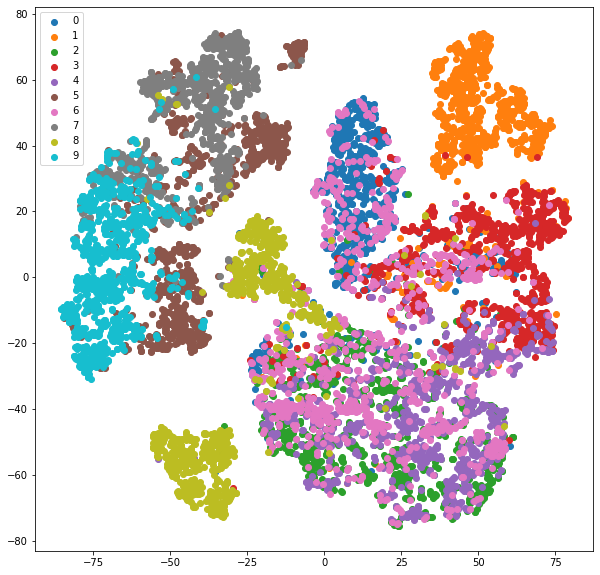

In [3]:
# Q1.6
# Using t-SNE, visualize the Fashion-MNIST data in the autoencoder’s hidden space.


!pip install torch numpy matplotlib sklearn
from torchvision.datasets import FashionMNIST
from torchvision import transforms
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
transform = transforms.Compose([transforms.ToTensor()])

trainset = FashionMNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset = FashionMNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

class Autoencoder(torch.nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = torch.nn.Sequential(
            torch.nn.Linear(28 * 28, 128),
            torch.nn.ReLU(),
            torch.nn.Linear(128, 64),
            torch.nn.ReLU(),
            torch.nn.Linear(64, 10)
        )
        self.decoder = torch.nn.Sequential(
            torch.nn.Linear(10, 64),
            torch.nn.ReLU(),
            torch.nn.Linear(64, 128),
            torch.nn.ReLU(),
            torch.nn.Linear(128, 28 * 28),
            torch.nn.Sigmoid()
        )
    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = self.encoder(x)
        x = self.decoder(x)
        x = x.view(-1, 1, 28, 28)
        return x

autoencoder = Autoencoder()

criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(autoencoder.parameters(), lr=0.001)

for epoch in range(10):
    for data in trainloader:
        img, _ = data
        optimizer.zero_grad()
        output = autoencoder(img)
        loss = criterion(output, img)
        loss.backward()
        optimizer.step()
    print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, 10, loss.item()))

hidden_representations = []
labels = []

for data in testloader:
    img, label = data
    output = autoencoder.encoder(img.view(-1, 28 * 28))
    hidden_representations.append(output.detach().numpy())
    labels.append(label.numpy())

hidden_representations = np.concatenate(hidden_representations, axis=0)
labels = np.concatenate(labels, axis=0)

tsne = TSNE(n_components=2)
hidden_tsne = tsne.fit_transform(hidden_representations)

plt.figure(figsize=(10, 10))
for i in range(10):
    plt.scatter(hidden_tsne[labels == i, 0], hidden_tsne[labels == i, 1], label=str(i))
plt.legend()
plt.show()


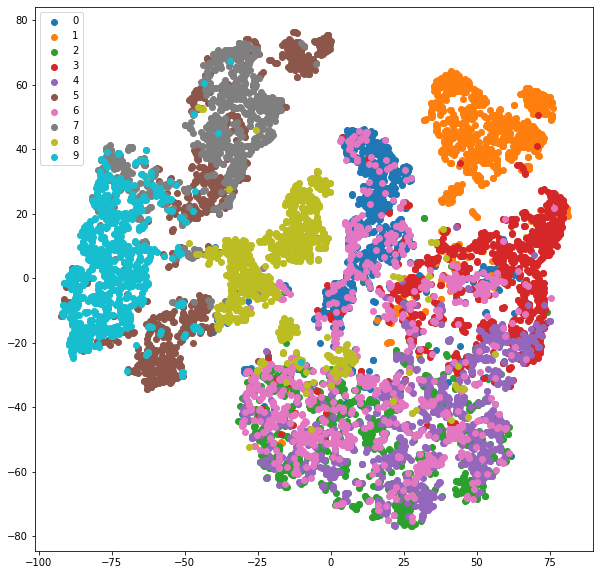

In [ ]:
'''hidden_representations = []
labels = []

for data in testloader:
    img, label = data
    output = autoencoder.encoder(img.view(-1, 28 * 28))
    hidden_representations.append(output.detach().numpy())
    labels.append(label.numpy())

hidden_representations = np.concatenate(hidden_representations, axis=0)
labels = np.concatenate(labels, axis=0)

tsne = TSNE(n_components=2)
hidden_tsne = tsne.fit_transform(hidden_representations)
'''
plt.figure(figsize=(10, 10))
for i in range(10):
    plt.scatter(hidden_tsne[labels == i, 0], hidden_tsne[labels == i, 1], label=str(i))
plt.legend()
plt.show()


Epoch [1/50], Loss: 0.0656
Epoch [2/50], Loss: 0.0501
Epoch [3/50], Loss: 0.0493
Epoch [4/50], Loss: 0.0471
Epoch [5/50], Loss: 0.0416
Epoch [6/50], Loss: 0.0397
Epoch [7/50], Loss: 0.0412
Epoch [8/50], Loss: 0.0369
Epoch [9/50], Loss: 0.0352
Epoch [10/50], Loss: 0.0339
Epoch [11/50], Loss: 0.0362
Epoch [12/50], Loss: 0.0363
Epoch [13/50], Loss: 0.0393
Epoch [14/50], Loss: 0.0330
Epoch [15/50], Loss: 0.0375
Epoch [16/50], Loss: 0.0343
Epoch [17/50], Loss: 0.0345
Epoch [18/50], Loss: 0.0363
Epoch [19/50], Loss: 0.0340
Epoch [20/50], Loss: 0.0335
Epoch [21/50], Loss: 0.0350
Epoch [22/50], Loss: 0.0356
Epoch [23/50], Loss: 0.0346
Epoch [24/50], Loss: 0.0355
Epoch [25/50], Loss: 0.0356
Epoch [26/50], Loss: 0.0348
Epoch [27/50], Loss: 0.0326
Epoch [28/50], Loss: 0.0335
Epoch [29/50], Loss: 0.0333
Epoch [30/50], Loss: 0.0328
Epoch [31/50], Loss: 0.0350
Epoch [32/50], Loss: 0.0366
Epoch [33/50], Loss: 0.0357
Epoch [34/50], Loss: 0.0355
Epoch [35/50], Loss: 0.0336
Epoch [36/50], Loss: 0.0321
E

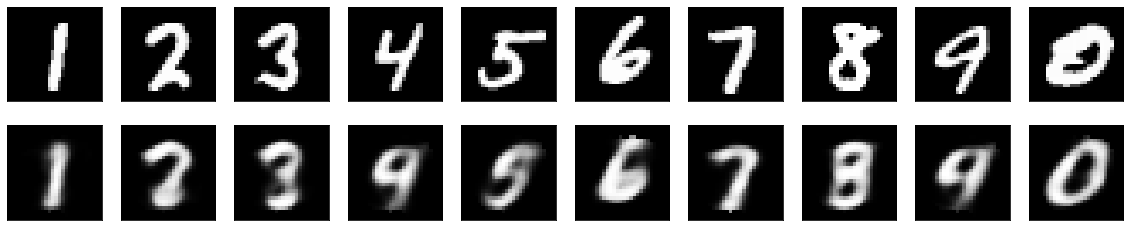

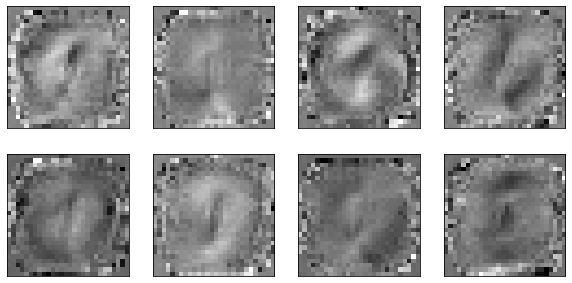

In [ ]:
# 1.5
# implement a simple linear encoder with one hidden layer of 8 neurons and compare the reconstructed images with those done using PCA. 
# Visualize the input weight matrix in the form of 8 images

import torch
import torch.nn as nn
import torchvision
import numpy as np
import matplotlib.pyplot as plt

# Load the MNIST dataset
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=torchvision.transforms.ToTensor(), download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=torchvision.transforms.ToTensor(), download=True)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=256, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=256, shuffle=False)

# Define the linear encoder model with one hidden layer of 8 neurons
class LinearEncoder(nn.Module):
    def __init__(self):
        super(LinearEncoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(784, 8)
        )
        self.decoder = nn.Sequential(
            nn.Linear(8, 784),
            nn.Sigmoid()
        )
        
    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x
    
# Define the optimization algorithm and loss function
model = LinearEncoder()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.MSELoss()

# Train the model for 50 epochs on the training set
for epoch in range(50):
    for images, _ in train_loader:
        images = images.view(-1, 784)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, images)
        loss.backward()
        optimizer.step()
    print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, 50, loss.item()))

# Generate reconstructed images using the trained model
with torch.no_grad():
    for images, _ in test_loader:
        images = images.view(-1, 784)
        outputs = model(images)
        reconstructed_images = outputs.detach().numpy()

# Plot a few original and reconstructed images side by side for comparison
n = 10  # Number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(images[i].view(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # Display reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(reconstructed_images[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Extract the weight matrix of the first layer
encoder_weights = model.encoder[0].weight.detach().numpy()

# Reshape each row into a 28x28 image and plot the resulting images
plt.figure(figsize=(10, 5))
for i in range(8):
    ax = plt.subplot(2, 4, i + 1)
    plt.imshow(encoder_weights[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Epoch [1/20], Loss: 0.0598
Epoch [2/20], Loss: 0.0529
Epoch [3/20], Loss: 0.0497
Epoch [4/20], Loss: 0.0444
Epoch [5/20], Loss: 0.0541
Epoch [6/20], Loss: 0.0452
Epoch [7/20], Loss: 0.0484
Epoch [8/20], Loss: 0.0472
Epoch [9/20], Loss: 0.0496
Epoch [10/20], Loss: 0.0430
Epoch [11/20], Loss: 0.0460
Epoch [12/20], Loss: 0.0465
Epoch [13/20], Loss: 0.0485
Epoch [14/20], Loss: 0.0484
Epoch [15/20], Loss: 0.0499
Epoch [16/20], Loss: 0.0470
Epoch [17/20], Loss: 0.0478
Epoch [18/20], Loss: 0.0436
Epoch [19/20], Loss: 0.0407
Epoch [20/20], Loss: 0.0429


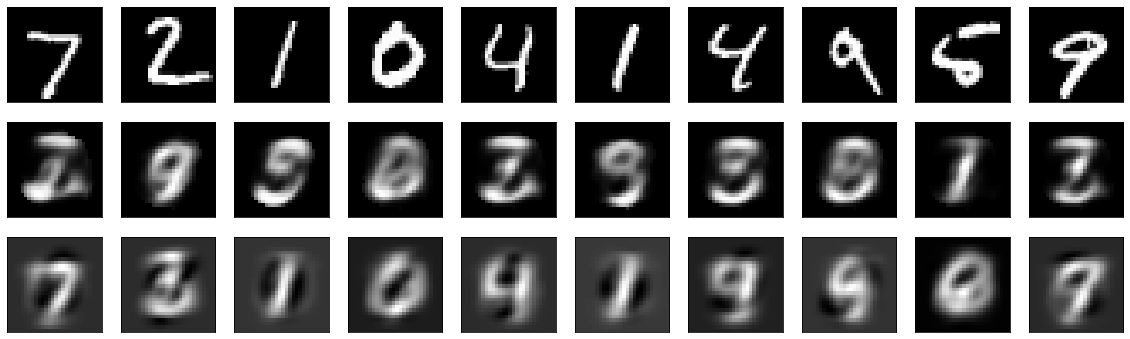

In [ ]:
# 1.4
# implement a simple linear encoder with one hidden layer of 8 neurons and compare the reconstructed images with those done using PCA. 
# Provide comments on your results.

import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from sklearn.decomposition import PCA

# Set device to use GPU if available, otherwise use CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define transform to convert images to tensor
transform = transforms.Compose([transforms.ToTensor()])

# Load dataset
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)

# Define data loader
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)

# Define the encoder and decoder models
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(28*28, 8),
            nn.ReLU())
        self.decoder = nn.Sequential(
            nn.Linear(8, 28*28),
            nn.Sigmoid())

    def forward(self, x):
        x = x.view(-1, 28*28)
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        decoded = decoded.view(-1, 1, 28, 28)
        return encoded, decoded

# Initialize the model and define loss criterion and optimizer
model = Autoencoder().to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
num_epochs = 20
for epoch in range(num_epochs):
    for data in train_loader:
        img, _ = data
        img = img.to(device)
        optimizer.zero_grad()
        encoded, output = model(img)
        loss = criterion(output, img)
        loss.backward()
        optimizer.step()

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

# Evaluate the model on test data and compare with PCA
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=True)

# Get the encoded and decoded images
with torch.no_grad():
    encoded_imgs = []
    decoded_imgs = []
    for data in test_loader:
        img, _ = data
        img = img.to(device)
        encoded, decoded = model(img)
        encoded_imgs.append(encoded)
        decoded_imgs.append(decoded.cpu())

    encoded_imgs = torch.cat(encoded_imgs, dim=0).cpu().numpy()
    decoded_imgs = torch.cat(decoded_imgs, dim=0).numpy()

# Compare with PCA
train_data = train_dataset.data.numpy().reshape(len(train_dataset), -1)
test_data = test_dataset.data.numpy().reshape(len(test_dataset), -1)

pca = PCA(n_components=8)
pca.fit(train_data)
pca_encoded_imgs = pca.transform(test_data)
pca_decoded_imgs = pca.inverse_transform(pca_encoded_imgs)

# Plot the original, reconstructed and PCA reconstructed images
import matplotlib.pyplot as plt

n = 10
plt.figure(figsize=(20, 6))
for i in range(n):
    # Original image
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(test_data[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Reconstructed image using linear encoder
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Reconstructed image using PCA
    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(pca_decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



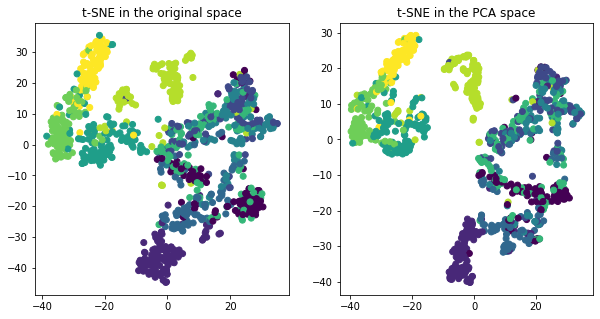

In [ ]:
# 1.3 
# Using t-SNE, visualize the Fashion-MNIST data in the original space and in the PCA space consisting of top 8 eigen images.

import torch
import torchvision
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Load Fashion-MNIST dataset
transform = torchvision.transforms.Compose([torchvision.transforms.ToTensor(),
                                            torchvision.transforms.Normalize((0.5,), (0.5,))])
trainset = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=1000, shuffle=True)

# Extract images and labels from the dataset
images, labels = next(iter(trainloader))

# Flatten the images into 1D tensors
images = images.view(images.shape[0], -1)

# Compute PCA
pca = PCA(n_components=8)
pca.fit(images)

# Transform the images into PCA space
pca_images = pca.transform(images)

# Compute t-SNE in the original space
tsne_orig = TSNE(n_components=2, random_state=0)
tsne_orig_results = tsne_orig.fit_transform(images)

# Compute t-SNE in the PCA space
tsne_pca = TSNE(n_components=2, random_state=0)
tsne_pca_results = tsne_pca.fit_transform(pca_images)

# Visualize t-SNE in the original space
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(tsne_orig_results[:, 0], tsne_orig_results[:, 1], c=labels)
plt.title('t-SNE in the original space')

# Visualize t-SNE in the PCA space
plt.subplot(1, 2, 2)
plt.scatter(tsne_pca_results[:, 0], tsne_pca_results[:, 1], c=labels)
plt.title('t-SNE in the PCA space')

plt.show()


  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/train-images-idx3-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw



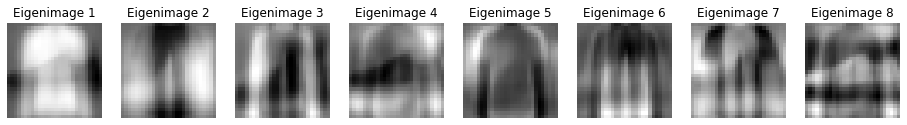

In [ ]:
# 1.2
# Generate 10 reconstructed images, one for each class. This will be done by using the top 8 eigen values/vectors. 
# Calculate the error between the original and the reconstructed images.

import torch
from torchvision import datasets, transforms
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])

trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)

data = trainset.data.numpy()
data = data.reshape(data.shape[0], -1)

data_mean = np.mean(data, axis=0)
data_std = np.std(data, axis=0)
data_norm = (data - data_mean) / data_std

pca = PCA(n_components=8)
pca.fit(data_norm)
eigenimages = pca.components_.reshape(8, 28, 28)

fig, axs = plt.subplots(1, 8, figsize=(16, 4))
for i in range(8):
    axs[i].imshow(eigenimages[i], cmap='gray')
    axs[i].axis('off')
    axs[i].set_title(f'Eigenimage {i+1}')
plt.show()


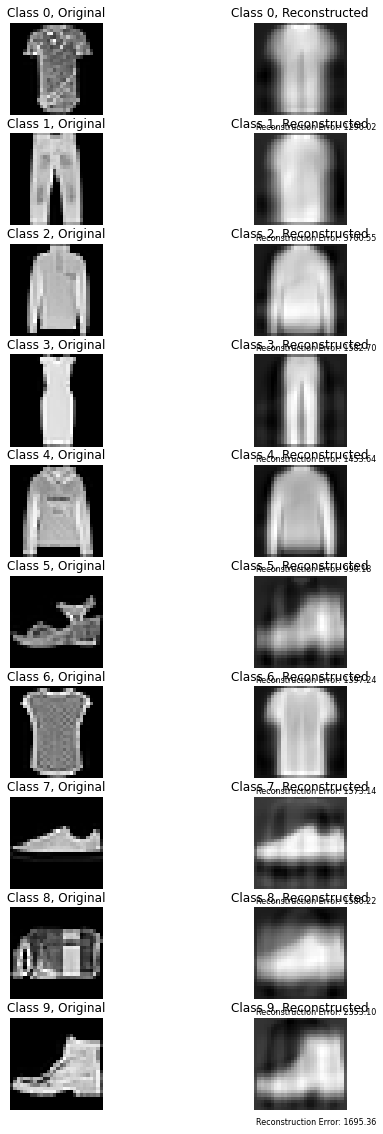

In [ ]:
## 1.1
## Perform PCA on Fashion-MNIST data and visualize first 8 eigen images resulting from PCA.

import torch
from torchvision import datasets, transforms
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])

trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)

data = trainset.data.numpy()
data = data.reshape(data.shape[0], -1)

data_mean = np.mean(data, axis=0)
data_std = np.std(data, axis=0)
data_norm = (data - data_mean) / data_std

pca = PCA(n_components=8)
pca.fit(data_norm)
eigenvectors = pca.components_.T

fig, axs = plt.subplots(10, 2, figsize=(8, 20))
for i in range(10):
    # select a random image from the i-th class
    class_data = data_norm[trainset.targets == i]
    random_idx = np.random.choice(class_data.shape[0])
    image = class_data[random_idx]

    # reconstruct the image using the top 8 eigenvectors
    coeffs = np.dot(eigenvectors.T, image)
    reconstructed_image = np.dot(eigenvectors, coeffs)

    # denormalize the original and reconstructed images
    original_image = (image * data_std) + data_mean
    reconstructed_image = (reconstructed_image * data_std) + data_mean

    # calculate the error between the original and reconstructed images
    error = np.mean((original_image - reconstructed_image) ** 2)

    # plot the original and reconstructed images side by side
    axs[i, 0].imshow(original_image.reshape(28, 28), cmap='gray')
    axs[i, 0].set_title(f'Class {i}, Original')
    axs[i, 0].axis('off')
    axs[i, 1].imshow(reconstructed_image.reshape(28, 28), cmap='gray')
    axs[i, 1].set_title(f'Class {i}, Reconstructed')
    axs[i, 1].axis('off')
    axs[i, 1].text(0, 32, f'Reconstruction Error: {error:.2f}', fontsize=8)
plt.show()



